In [15]:
import numpy as np
sin=50  #initial stock price
str=55   #strike price
prd=90   #time period in days
free=0.01 #risk-free rate 
bin=60   # bin-period binomial model
UpFactor=0.5  #up - factor
DownFactor=1.7  #down-factor
def sortarray(arr):
    arr.sort()
    print()
    for i in range(0,len(arr)):
      print("_",end=" ")
    print()
    return

def binom_tree(sin,str,prd,free,bin,UpFactor,DownFactor):
  
  prd=prd/365   # prd must be in years,since expiration time is in days,we divide
            # by 365
  quo=prd/bin    
  neg_di = np.exp(-free*quo) # = 1/(1+free) = 1/(1+(-1+e^(free*quo)))
  Q = (np.exp(free*quo)-DownFactor)/(UpFactor-DownFactor) # Q = (1+free-DownFactor)/(UpFactor-DownFactor)

  Matp = np.zeros(bin+1)
  Matp[0] = sin*DownFactor**bin # = Matp(TTTTT...), we will keep multiplying with UpFactor and 
                 # dividing with DownFactor to get all possible values in the final row 
                 # of the tree
  for i in range(1,bin+1):
   Matp[i] = Matp[i-1]*UpFactor/DownFactor  # this is the step where we multiply with UpFactor and 
                 # divide with DownFactor to get all possible values in the final row 
                 # of the tree

   Matv = np.zeros(bin+1)
  for i in range(0,bin+1):
   Matv[i] = max(0, Matp[i]-str)  #self-explanatory



  for i in np.arange(bin,0,-1):   #1.nested loop in order to go backwards in the  
   for i in range(0,i):         # tree, arange function does that
     Matv[i] = neg_di*(Q*Matv[i+1]+(1-Q)*Matv[i]) #2.the second loop calculates the actual 
                                #values of the option prices at that time step           
  return Matv[0]
arr=[1,43,23,63,45,567,98,34,87,22321,56,7,0,4,43]
sortarray(arr)
for bin in (30,60,90):
  sortarray(arr)
  print(binom_tree(sin,str,prd,free,bin,UpFactor,DownFactor))
  print("put option price for prd =",bin,"is",binom_tree(sin,str,prd,free,bin,UpFactor,DownFactor) + (str*((1+free)**(-30))) - sin)
  print("    ")
  sortarray(arr)
sortarray(arr)


_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
44.721736363662835
put option price for prd = 30 is 35.52749684195466
    

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
48.94940786711122
put option price for prd = 60 is 39.755168345403035
    

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
49.77075273689071
put option price for prd = 90 is 40.57651321518253
    

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


In [16]:
import numpy as np
def dump(arr):
 
    # initialize a variable
    # to store the sum
    # while iterating through
    # the array later
    arr.sort()
    for x in range(0,len(arr)):

      print("_",end=" ")
    print()
    return

sin=50  #initial stock price
str=55   #strike price
prd=90   #time period in days
free=0.01 #risk-free rate 
bin=30   # bin-period binomial model
UpFactor=0.5  #up - factor
DownFactor=1.7  #down-f
prd=prd/365   # prd must be in years,since expiration time is in days,we divide
            # by 365
quo=prd/bin    
neg_di = np.exp(-free*quo)          # = 1/(1+free) = 1/(1+(-1+e^(free*quo)))
Q = (np.exp(free*quo)-DownFactor)/(UpFactor-DownFactor)      # Q = (1+free-DownFactor)/(UpFactor-DownFactor)

Matp = np.zeros(bin+1)
downFactor = np.zeros(bin+1)
Matp[0]=sin
for i in range(1,bin+1):
   Matp[i] = sin * UpFactor**i * DownFactor**(bin-i)  #initial binomial tree
Matv = np.zeros(bin+1)
for j in range(0,bin+1):
   Matv[j] = max(0,str-Matp[j])         #calculating stopping time
dump([1,2,3,4,5,6,7,8,9,10,11])
for i in np.arange(bin-1,-1,-1):
  for j in range(0,i+1):
    Matp[j] = sin * UpFactor**j * DownFactor**(i-j)
    Matv[j] = neg_di * (Q*Matv[j+1]+(1-Q)*Matv[j])
    Matv[j] = max(Matv[j], str-Matp[j])           #final binomial tree for american option
    print((Matv[j+1]-Matv[j])/(Matp[j+1]-Matp[j])) #option deltas
    
dump([1,2,3,4,5,6,7,8,9,10,11])

print(Matv[0])                            #option premium price



_ _ _ _ _ _ _ _ _ _ _ 
1.72916217343051e-08
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.03722234967814236
-1.0
-1.0000000000000002
-0.999999999999996
-0.999999999999986
-0.9999999999999936
-0.9999999999999807
-0.9999999999995459
-1.0000000000017633
-1.0000000000062867
-1.0000000000182492
-0.9999999999310949
-1.0000000002471745
-1.0000000000456737
-1.0000000023293492
-1.0000000000000002
-1.0
-1.0
1.2249238724434263e-08
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.010854351690574903
-0.3181286463886872
-1.0000000000000002
-1.0000000000000016
-1.0000000000000049
-0.9999999999999936
-0.9999999999999807
-0.9999999999999155
-0.9999999999992503
-0.9999999999977423
-0.9999999999891976
-1.0000000000298699
-0.9999999999113398
-1.0000000000456737
-1.000000000388225
-1.0000000000000002
-1.0
-1.0
8.677257207778595e-09
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.003165220670952713
-0.10045813245579596
-0.5172268323176552
-1.0000000000000002
-1.0000000000000002
-1.0000000000


_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
-0.42638370330533104
166.34461935733208
  

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
-0.12903563474425805
469.76594625692104
  

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
0.22358654623997043
807.9646598834049
  

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
0.18707572202570133
4.828497940613504
  

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


<function matplotlib.pyplot.show(close=None, block=None)>

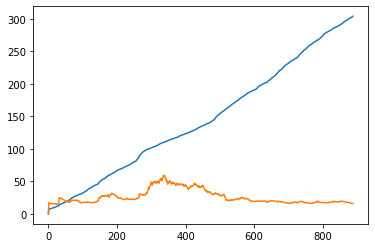

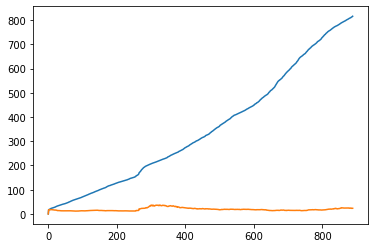

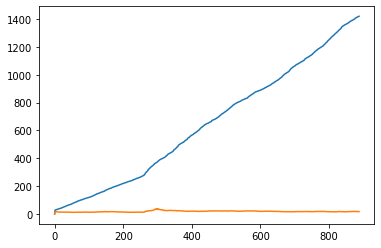

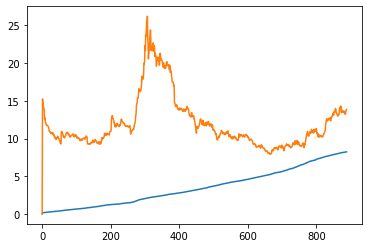

In [17]:
import yfinance as yf
import statistics as st
import numpy as np
import math
import matplotlib.pyplot as plt
def sortarray(arr):
    arr.sort()
    print()
    for i in range(0,len(arr)):
      print("_",end=" ")
    print()
    return
arr=[1,43,23,63,45,567,98,34,87,22321,56,7,0,4,43]
sortarray(arr)
data1 = yf.download("SBIN.NS",start="2019-01-01", end = "2022-09-20", progress= False)
si_rtn = (data1.iloc[1,1] - data1.iloc[918,4])/data1.iloc[1,1]           #simple return
an_rtn = ((si_rtn+1)**(1/4)) - 1                                        #annual return
volvo = (st.stdev(data1.iloc[:919,1] - data1.iloc[:919,2]))*(math.sqrt(919)) #volatility
mean1 = np.zeros(889)
for j in range(1,889):
  mean1[j] = (sum(data1.iloc[:j+29,1] - data1.iloc[:j+29,2]))/30        #moving average
sortarray(arr)
mov_vol1 = np.zeros(889)
for i in range(1,889):
 mov_vol1[i]=(st.stdev((data1.iloc[:i+29,2] - data1.iloc[:i+29,1])/(data1.iloc[i,1]))*100)*math.sqrt(252) #moving volatility
#printing the values for SBI bank
x = np.zeros(889)
print(an_rtn)
print(volvo)
print("  ")
sortarray(arr)
#similar code for TECH Mahindra
data2 = yf.download("TECHM.NS",start="2019-01-01", end = "2022-09-20", progress= False)
si_rtn = (data2.iloc[1,1] - data2.iloc[918,4])/data2.iloc[1,1]
an_rtn = ((si_rtn+1)**(1/4)) - 1
volvo = (st.stdev(data2.iloc[:919,1] - data2.iloc[:919,2]))*(math.sqrt(919))
mean2 = np.zeros(889)
for j in range(1,889):
  mean2[j] = (sum(data2.iloc[:j+29,1] - data2.iloc[:j+29,2]))/30

mov_vol2 = np.zeros(889)
for i in range(1,889):
 mov_vol2[i]=(st.stdev((data2.iloc[:i+29,2] - data2.iloc[:i+29,1])/(data2.iloc[i,1]))*100)*math.sqrt(252)

x = np.zeros(889)
print(an_rtn)
print(volvo)
print("  ")
sortarray(arr)
#similar code for reliance
data3 = yf.download("RELIANCE.NS",start="2019-01-01", end = "2022-09-20", progress= False)
si_rtn = (data3.iloc[1,1] - data3.iloc[918,4])/data3.iloc[1,1]
an_rtn = (((-si_rtn)+1)**(1/4)) - 1
volvo = (st.stdev(data3.iloc[:919,1] - data3.iloc[:919,2]))*(math.sqrt(919))
mean3 = np.zeros(889)
for j in range(1,889):
  mean3[j] = (sum(data3.iloc[:j+29,1] - data3.iloc[:j+29,2]))/30

mov_vol3 = np.zeros(889)
for i in range(1,889):
 mov_vol3[i]=(st.stdev((data3.iloc[:i+29,2] - data3.iloc[:i+29,1])/(data3.iloc[i,1]))*100)*math.sqrt(252)

x = np.zeros(889)
print(an_rtn)
print(volvo)
print("  ")
sortarray(arr)
#similar code for Infosys
data4 = yf.download("INFY",start="2019-01-01", end = "2022-09-28", progress= False)
si_rtn = (data4.iloc[1,1] - data4.iloc[918,4])/data4.iloc[1,1]
an_rtn = (((-si_rtn)+1)**(1/4)) - 1
volvo = (st.stdev(data4.iloc[:919,1] - data4.iloc[:919,2]))*(math.sqrt(919))
mean4 = np.zeros(889)
for j in range(1,889):
  mean4[j] = (sum(data4.iloc[:j+29,1] - data4.iloc[:j+29,2]))/30

mov_vol4 = np.zeros(889)
for i in range(1,889):
 mov_vol4[i]=(st.stdev((data4.iloc[:i+29,2] - data4.iloc[:i+29,1])/(data4.iloc[i,1]))*100)*math.sqrt(252)

x = np.zeros(889)
print(an_rtn)
print(volvo)
print("  ")
sortarray(arr)
#code for plotting the 30 day rolling average and 30 day rolling volatility
plt.figure(1)         
plt.plot(mean1)
plt.plot(mov_vol1)
sortarray(arr)
plt.figure(2)
plt.plot(mean2)
plt.plot(mov_vol2)
sortarray(arr)
plt.figure(3)
plt.plot(mean3)
plt.plot(mov_vol3)
sortarray(arr)
plt.figure(4)
plt.plot(mean4)
plt.plot(mov_vol4)
plt.show

In [18]:

import yfinance as yf
import numpy as np
def sortarray(arr):
    arr.sort()
    print()

    for i in range(0,len(arr)):
      print("_",end=" ")
    print()

    return

data = yf.download(["HDFCBANK.NS","ICICIBANK.NS","AXISBANK.NS","KOTAKBANK.NS"],start="2019-01-01", end = "2022-09-28")
arr=[1,43,23,63,45,567,98,34,87,22321,56,7,0,4,43]
sortarray(arr)
for i in range(0,925):
  data.iloc[i,0] = (data.iloc[i,0])/5    # 0.2 allocation = 2/10 = 1/5
  data.iloc[i,1] = (data.iloc[i,1])/3    # 0.3 allocation = 3/10 = 1/3
  data.iloc[i,2] = (data.iloc[i,2])/3    # 0.3 allocation = 3/10 = 1/3
  data.iloc[i,3] = (data.iloc[i,3])/5    # 0.2 allocation = 2/10 = 1/5

sortarray(arr)
closes = data['Adj Close']
closes.columns = ['AXISB','HDFCB','ICICIB','KOTAKB']
AXISB_returns = closes.AXISB.pct_change().dropna()
HDFCB_returns = closes.HDFCB.pct_change().dropna()
ICICIB_returns = closes.ICICIB.pct_change().dropna()
KOTAKB_returns = closes.KOTAKB.pct_change().dropna()

def sortino_ratio(returns, adjustment_factor=0.0):
  returns_risk_adj = np.asanyarray(returns - adjustment_factor)
  mean_annual_return = returns_risk_adj.mean() * 252

    # compute the downside deviation
  downside_diff = np.clip(returns_risk_adj, np.NINF, 0)
  np.square(downside_diff, out=downside_diff)
  annualized_downside_deviation = np.sqrt(downside_diff.mean()) * np.sqrt(252)
    
  return mean_annual_return / annualized_downside_deviation

def sharpe_ratio(returns, adjustment_factor=0.0):
  returns_risk_adj = returns - adjustment_factor
  return (
        returns_risk_adj.mean() / returns_risk_adj.std()
    ) * np.sqrt(252)

print(sortino_ratio(AXISB_returns,adjustment_factor=0.0))
print(sharpe_ratio(AXISB_returns,adjustment_factor=0.0))
print("  ")
sortarray(arr)
print(sortino_ratio(HDFCB_returns,adjustment_factor=0.0))
print(sharpe_ratio(HDFCB_returns,adjustment_factor=0.0))
print("  ")
sortarray(arr)
print(sortino_ratio(ICICIB_returns,adjustment_factor=0.0))
print(sharpe_ratio(ICICIB_returns,adjustment_factor=0.0))
print("  ")
sortarray(arr)
print(sortino_ratio(KOTAKB_returns,adjustment_factor=0.0))
print(sharpe_ratio(KOTAKB_returns,adjustment_factor=0.0))
print("  ")
print("  ")
sortarray(arr)

data1 = yf.download(["HDFCBANK.NS","ICICIBANK.NS","AXISBANK.NS","KOTAKBANK.NS"],start="2019-01-01", end = "2022-09-28")

for i in range(0,925):
  data1.iloc[i,0] = (data1.iloc[i,0])/5     # 0.2 allocation = 2/10 = 1/5
  data1.iloc[i,1] = (data1.iloc[i,1])/5     # 0.2 allocation = 2/10 = 1/5
  data1.iloc[i,2] = (data1.iloc[i,2])/3     # 0.3 allocation = 3/10 = 1/3
  data1.iloc[i,3] = (data1.iloc[i,3])/3     # 0.3 allocation = 3/10 = 1/3


closes1 = data1['Adj Close']
closes1.columns = ['AXISB1','HDFCB1','ICICIB1','KOTAKB1']
AXISB_returns1 = closes1.AXISB1.pct_change().dropna()
HDFCB_returns1 = closes1.HDFCB1.pct_change().dropna()
ICICIB_returns1 = closes1.ICICIB1.pct_change().dropna()
KOTAKB_returns1 = closes1.KOTAKB1.pct_change().dropna()
sortarray(arr)
print(sortino_ratio(AXISB_returns1,adjustment_factor=0.0))
print(sharpe_ratio(AXISB_returns1,adjustment_factor=0.0))
print("  ")
print(sortino_ratio(HDFCB_returns1,adjustment_factor=0.0))
print(sharpe_ratio(HDFCB_returns1,adjustment_factor=0.0))
print("  ")
print(sortino_ratio(ICICIB_returns1,adjustment_factor=0.0))
print(sharpe_ratio(ICICIB_returns1,adjustment_factor=0.0))
print("  ")
print(sortino_ratio(KOTAKB_returns1,adjustment_factor=0.0))
print(sharpe_ratio(KOTAKB_returns1,adjustment_factor=0.0))
sortarray(arr)
sortarray(arr)
#The ratios are equal

[*********************100%***********************]  4 of 4 completed

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
0.44583259536020076
0.3187696935169505
  

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
0.6192797550592025
0.4247962579904853
  

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
1.1959252227678483
0.82571241157238
  

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
0.6816265663310908
0.47045106610032134
  
  

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
[*********************100%***********************]  4 of 4 completed

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
0.4458326960527287
0.3187697589304968
  
0.6192797538815699
0.4247962573759921
  
1.1959252433608547
0.8257124383824228
  
0.6816265504263033
0.47045105158544603

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
